## Machine learning 1 - exercise 1 - Wines 
* Use regression to predict the alcohol level of the wine.
* Use binary classification to predict the type of wine.
* Use multiclass classification to predict the quality of the wine.
#### For each task test two classifiers, report accuracy with the default parameters. Perform some manual optimization of the parameters (at least 5 different values for each parameter) and plot the new obtained accuracy as a function of the chosen parameter (max. 2). Using your best result, plot the feature importance for the binary classification or the coefficient magnitudes for regression (hint: choose your classifier accordingly).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
%matplotlib inline

In [2]:
df_red = pd.read_csv('assigment_data/winequality-red.csv', sep=';')
df_white = pd.read_csv('assigment_data/winequality-white.csv', sep=';')

In [3]:
df_red['type'] = 1

In [4]:
df_white['type'] = 0

In [5]:
df = pd.concat([df_red, df_white])

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Use regression to predict the alcohol level of the wine.

In [7]:
from sklearn.model_selection import train_test_split
X = np.array(df.drop(['alcohol'], 1))
y = np.array(df['alcohol'])

### As first classifier, we choose Lasso

In [8]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y)
training_accuracy = []
test_accuracy = []

In [9]:
lasso = Lasso().fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lasso.score(X_train, y_train)))
training_accuracy.append(lasso.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lasso.score(X_test, y_test)))
test_accuracy.append(lasso.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set accuracy: 0.10
Test set accuracy: 0.10
Number of features used: 2


In [10]:
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lasso.score(X_train, y_train)))
training_accuracy.append(lasso.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lasso.score(X_test, y_test)))
test_accuracy.append(lasso.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set accuracy: 0.10
Test set accuracy: 0.10
Number of features used: 2


In [11]:
# we are underfitting with the default alpha, so let's try a smaller alpha
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lasso001.score(X_train, y_train)))
training_accuracy.append(lasso001.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lasso001.score(X_test, y_test)))
test_accuracy.append(lasso001.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set accuracy: 0.39
Test set accuracy: 0.35
Number of features used: 7


In [12]:
# let's try an even smaller alpha for better results
lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lasso0001.score(X_train, y_train)))
training_accuracy.append(lasso0001.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lasso0001.score(X_test, y_test)))
test_accuracy.append(lasso0001.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

Training set accuracy: 0.44
Test set accuracy: 0.40
Number of features used: 11


In [13]:
# let's try an even smaller alpha for better results
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lasso00001.score(X_train, y_train)))
training_accuracy.append(lasso00001.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lasso00001.score(X_test, y_test)))
test_accuracy.append(lasso00001.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set accuracy: 0.81
Test set accuracy: 0.83
Number of features used: 12


In [14]:
# let's normalize
lasso00001normalized = Lasso(alpha=0.0001, max_iter=100000, normalize=True).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lasso00001normalized.score(X_train, y_train)))
training_accuracy.append(lasso00001normalized.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lasso00001normalized.score(X_test, y_test)))
test_accuracy.append(lasso00001normalized.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(lasso00001normalized.coef_ != 0)))

Training set accuracy: 0.82
Test set accuracy: 0.84
Number of features used: 12


In [15]:
# let's try set tolerance
lasso00001_norm_tol = Lasso(alpha=0.0001, max_iter=100000, normalize=True, tol=0.0001).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lasso00001_norm_tol.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lasso00001_norm_tol.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001_norm_tol.coef_ != 0)))

Training set accuracy: 0.82
Test set accuracy: 0.84
Number of features used: 12


In [16]:
# let's try no intercept
lasso00001_norm_tol = Lasso(alpha=0.0001, max_iter=100000, fit_intercept=False).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lasso00001_norm_tol.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lasso00001_norm_tol.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001_norm_tol.coef_ != 0)))

Training set accuracy: 0.43
Test set accuracy: 0.39
Number of features used: 12


### plot accuracy change

In [17]:
lasso_settings = [1, 0.1, 0.01, 0.001, 0.0001, '0.0001 norm']

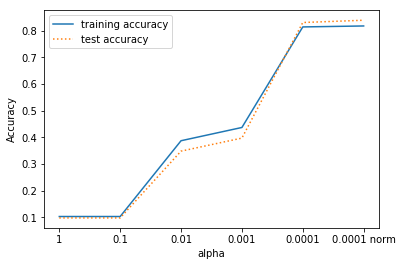

In [18]:
plt.plot(lasso_settings, training_accuracy, label="training accuracy")
plt.plot(lasso_settings, test_accuracy, label="test accuracy", linestyle= ':')
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()

### lasso00001normalized seems best, let's plot coefficients.

(-4, 4)

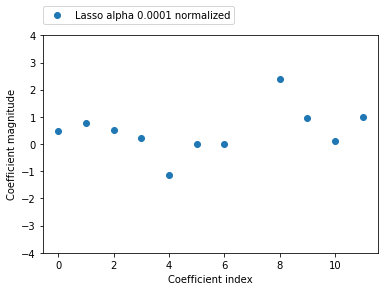

In [19]:
plt.plot(lasso00001normalized.coef_, 'o', label="Lasso alpha 0.0001 normalized")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-4, 4) #one feature has a low coefficient magnitude of little less than -600, so it's not visible in this limitation

(-650, -600)

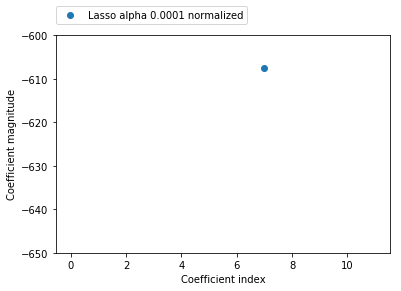

In [20]:
plt.plot(lasso00001normalized.coef_, 'o', label="Lasso alpha 0.0001 normalized")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-650, -600)

### As second classifier, we choose ElasticNet

In [21]:
from sklearn.linear_model import ElasticNet

X = np.array(df.drop(['alcohol'], 1))
y = np.array(df['alcohol'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
training_accuracy = []
test_accuracy = []

In [22]:
elastic = ElasticNet().fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic.score(X_train, y_train)))
training_accuracy.append(elastic.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic.score(X_test, y_test)))
test_accuracy.append(elastic.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic.coef_ != 0)))

Training set accuracy: 0.13
Test set accuracy: 0.13
Number of features used: 2


In [23]:
#reduce alpha to combat underfitting
elastic001 = ElasticNet(alpha=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic001.score(X_train, y_train)))
training_accuracy.append(elastic001.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic001.score(X_test, y_test)))
test_accuracy.append(elastic001.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic001.coef_ != 0)))

Training set accuracy: 0.39
Test set accuracy: 0.36
Number of features used: 10


In [24]:
#reduce alpha again
elastic0001 = ElasticNet(alpha=0.001).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic0001.score(X_train, y_train)))
training_accuracy.append(elastic0001.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic0001.score(X_test, y_test)))
test_accuracy.append(elastic0001.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic0001.coef_ != 0)))

Training set accuracy: 0.43
Test set accuracy: 0.40
Number of features used: 12


In [25]:
#reduce alpha 
elastic00001 = ElasticNet(alpha=0.0001).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic00001.score(X_train, y_train)))
training_accuracy.append(elastic00001.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic00001.score(X_test, y_test)))
test_accuracy.append(elastic00001.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic00001.coef_ != 0)))

Training set accuracy: 0.46
Test set accuracy: 0.42
Number of features used: 12


In [26]:
#add normalization
elastic00001norm = ElasticNet(alpha=0.0001, normalize=True).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic00001norm.score(X_train, y_train)))
training_accuracy.append(elastic00001norm.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic00001norm.score(X_test, y_test)))
test_accuracy.append(elastic00001norm.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic00001norm.coef_ != 0)))

Training set accuracy: 0.64
Test set accuracy: 0.64
Number of features used: 12


In [27]:
#try reduce l1/l2 ratio
elastic00001l101 = ElasticNet(alpha=0.0001, normalize=True, l1_ratio=0.1).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic00001l101.score(X_train, y_train)))
training_accuracy.append(elastic00001l101.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic00001l101.score(X_test, y_test)))
test_accuracy.append(elastic00001l101.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic00001l101.coef_ != 0)))

Training set accuracy: 0.59
Test set accuracy: 0.58
Number of features used: 12


In [28]:
#increase l1/l2 ratio
elastic00001l103 = ElasticNet(alpha=0.0001, normalize=True, l1_ratio=0.3).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic00001l103.score(X_train, y_train)))
training_accuracy.append(elastic00001l103.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic00001l103.score(X_test, y_test)))
test_accuracy.append(elastic00001l103.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic00001l103.coef_ != 0)))

Training set accuracy: 0.61
Test set accuracy: 0.61
Number of features used: 12


In [29]:
#increase l1/l2 ratio
elastic00001l103 = ElasticNet(alpha=0.0001, normalize=True, l1_ratio=0.5).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic00001l103.score(X_train, y_train)))
training_accuracy.append(elastic00001l103.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic00001l103.score(X_test, y_test)))
test_accuracy.append(elastic00001l103.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic00001l103.coef_ != 0)))

Training set accuracy: 0.64
Test set accuracy: 0.64
Number of features used: 12


In [30]:
#increase l1/l2 ratio
elastic00001l107 = ElasticNet(alpha=0.0001, normalize=True, l1_ratio=0.7).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic00001l107.score(X_train, y_train)))
training_accuracy.append(elastic00001l107.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic00001l107.score(X_test, y_test)))
test_accuracy.append(elastic00001l107.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic00001l107.coef_ != 0)))

Training set accuracy: 0.69
Test set accuracy: 0.69
Number of features used: 12


In [31]:
#change l1/l2 ratio
elastic00001l1 = ElasticNet(alpha=0.0001, normalize=True, l1_ratio=1).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(elastic00001l1.score(X_train, y_train)))
training_accuracy.append(elastic00001l1.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(elastic00001l1.score(X_test, y_test)))
test_accuracy.append(elastic00001l1.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(elastic00001l1.coef_ != 0)))

Training set accuracy: 0.82
Test set accuracy: 0.84
Number of features used: 12


### plot accuracy change

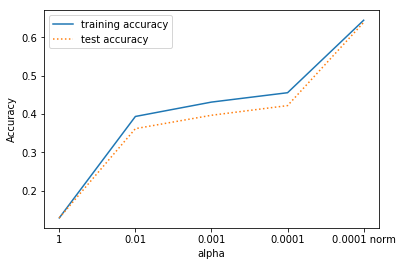

In [32]:
elastic_settings = [1, 0.01, 0.001, 0.0001, '0.0001 norm']
plt.plot(elastic_settings, training_accuracy[:5], label="training accuracy")
plt.plot(elastic_settings, test_accuracy[:5], label="test accuracy", linestyle= ':')
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()

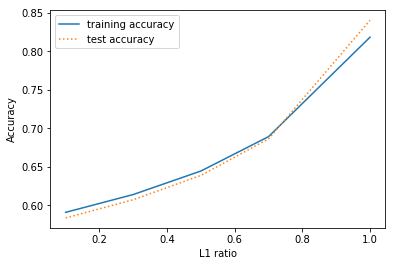

In [33]:
elastic_settings = [0.1, 0.3, 0.5, 0.7, 1]
plt.plot(elastic_settings, training_accuracy[5:], label="training accuracy")
plt.plot(elastic_settings, test_accuracy[5:], label="test accuracy", linestyle= ':')
plt.ylabel("Accuracy")
plt.xlabel("L1 ratio")
plt.legend()

### plot coefficients for elastic00001l1

(-10, 10)

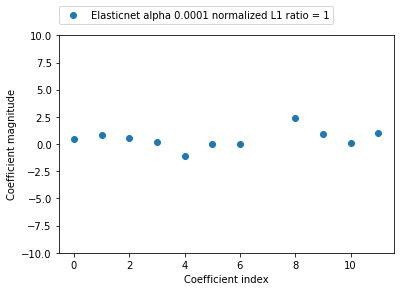

In [34]:
plt.plot(elastic00001l1.coef_, 'o', label="Elasticnet alpha 0.0001 normalized L1 ratio = 1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-10, 10) #one feature has a low coefficient magnitude of little less than -600, so it's not visible in this limitation

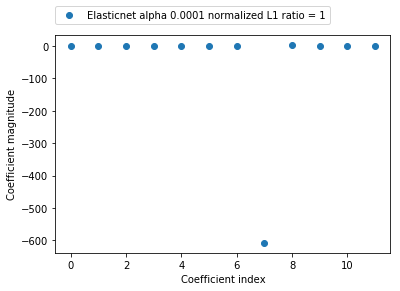

In [35]:
plt.plot(elastic00001l1.coef_, 'o', label="Elasticnet alpha 0.0001 normalized L1 ratio = 1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(ncol=2, loc=(0, 1.05))

### Use binary classification to predict the type of wine.

In [36]:
X = np.array(df.drop(['type'], 1))
y = np.array(df['type'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
training_accuracy = []
test_accuracy = []

### As first classifier, we choose LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lr.score(X_test, y_test)))

Training set accuracy: 0.98
Test set accuracy: 0.98


In [38]:
# decrease C
lrc001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrc001.score(X_train, y_train)))
training_accuracy.append(lrc001.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lrc001.score(X_test, y_test)))
test_accuracy.append(lrc001.score(X_test, y_test))

Training set accuracy: 0.95
Test set accuracy: 0.94


In [39]:
# decrease C
lrc01 = LogisticRegression(C=0.1).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrc01.score(X_train, y_train)))
training_accuracy.append(lrc01.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lrc01.score(X_test, y_test)))
test_accuracy.append(lrc01.score(X_test, y_test))

Training set accuracy: 0.97
Test set accuracy: 0.96


In [40]:
#add the C=1 accuracy to list for the plot
lr = LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lr.score(X_train, y_train)))
training_accuracy.append(lr.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lr.score(X_test, y_test)))
test_accuracy.append(lr.score(X_test, y_test))

Training set accuracy: 0.98
Test set accuracy: 0.98


In [41]:
# increase C
lrc10 = LogisticRegression(C=10).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrc10.score(X_train, y_train)))
training_accuracy.append(lrc10.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lrc10.score(X_test, y_test)))
test_accuracy.append(lrc10.score(X_test, y_test))

Training set accuracy: 0.99
Test set accuracy: 0.99


In [42]:
# increase C
lrc100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrc100.score(X_train, y_train)))
training_accuracy.append(lrc100.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lrc100.score(X_test, y_test)))
test_accuracy.append(lrc100.score(X_test, y_test))

Training set accuracy: 0.99
Test set accuracy: 0.99


In [43]:
# use l1 regularization 
lrregl1 = LogisticRegression(penalty='l1').fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrregl1.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lrregl1.score(X_test, y_test)))

Training set accuracy: 0.99
Test set accuracy: 0.99


In [44]:
#use new lists for solver accuracies
training_accuracy2 = []
test_accuracy2 = []

# use saga
lrsolversaga = LogisticRegression(penalty='l1', solver='saga', max_iter=10000).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrsolversaga.score(X_train, y_train)))
training_accuracy2.append(lrsolversaga.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lrsolversaga.score(X_test, y_test)))
test_accuracy2.append(lrsolversaga.score(X_test, y_test))

Training set accuracy: 0.97
Test set accuracy: 0.96


In [45]:
# use newton-cg
lrsolvernewton = LogisticRegression(solver='newton-cg').fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrsolvernewton.score(X_train, y_train)))
training_accuracy2.append(lrsolvernewton.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lrsolvernewton.score(X_test, y_test)))
test_accuracy2.append(lrsolvernewton.score(X_test, y_test))

Training set accuracy: 0.99
Test set accuracy: 0.98


In [46]:
# use sag
lrsolversag = LogisticRegression(solver='sag', max_iter=10000).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrsolversag.score(X_train, y_train)))
training_accuracy2.append(lrsolversag.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lrsolversag.score(X_test, y_test)))
test_accuracy2.append(lrsolversag.score(X_test, y_test))

Training set accuracy: 0.97
Test set accuracy: 0.96


In [47]:
# use lbfgs
lrsolverlbfgs = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrsolverlbfgs.score(X_train, y_train)))
training_accuracy2.append(lrsolverlbfgs.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lrsolverlbfgs.score(X_test, y_test)))
test_accuracy2.append(lrsolverlbfgs.score(X_test, y_test))

Training set accuracy: 0.98
Test set accuracy: 0.98


In [48]:
# use liblinear
lrsolverlbfgs = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrsolverlbfgs.score(X_train, y_train)))
training_accuracy2.append(lrsolverlbfgs.score(X_train, y_train))
print("Test set accuracy: {:.2f}".format(lrsolverlbfgs.score(X_test, y_test)))
test_accuracy2.append(lrsolverlbfgs.score(X_test, y_test))

Training set accuracy: 0.98
Test set accuracy: 0.98


In [49]:
# change class balance
lrbalanced = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(lrbalanced.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lrbalanced.score(X_test, y_test)))

Training set accuracy: 0.98
Test set accuracy: 0.97


### plot accuracy change

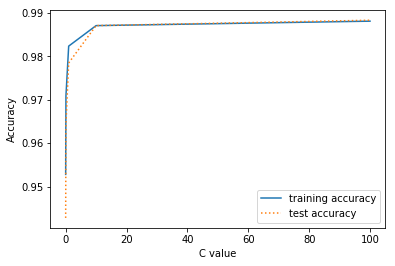

In [50]:
lr_settings = [0.01, 0.1, 1, 10, 100]

plt.plot(lr_settings, training_accuracy, label="training accuracy")
plt.plot(lr_settings, test_accuracy, label="test accuracy", linestyle= ':')
plt.ylabel("Accuracy")
plt.xlabel("C value")
plt.legend()

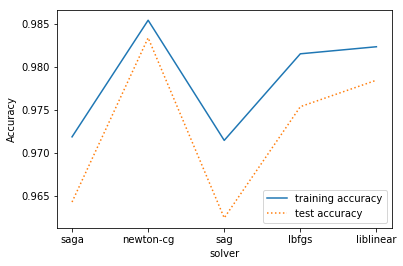

In [51]:
lr_settings = ['saga', 'newton-cg', 'sag', 'lbfgs', 'liblinear']

plt.plot(lr_settings, training_accuracy2, label="training accuracy")
plt.plot(lr_settings, test_accuracy2, label="test accuracy", linestyle= ':')
plt.ylabel("Accuracy")
plt.xlabel("solver")
plt.legend()

### plot coefficients for lrc100

In [52]:
names = list(df.drop(['type'], 1))

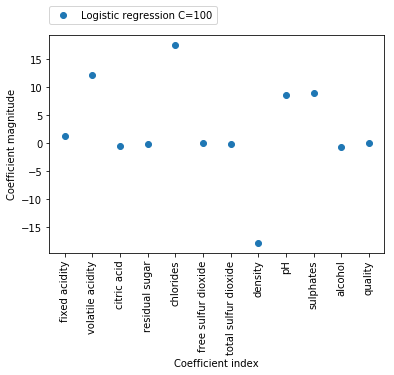

In [53]:
plt.plot(lrc100.coef_.T, 'o', label="Logistic regression C=100")

plt.xticks(range(len(names)), names, rotation=90)
plt.hlines(0, 0, range(len(names)))
list(df.drop(['type'], 1))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(ncol=2, loc=(0, 1.05))

### As second classifier, we choose Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

X = np.array(df.drop(['type'], 1))
y = np.array(df['type'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
training_accuracy = []
test_accuracy = []

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.984


In [55]:
tree10 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree10.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree10.score(X_train, y_train)))
training_accuracy.append(tree10.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(tree10.score(X_test, y_test)))
test_accuracy.append(tree10.score(X_test, y_test))

Accuracy on training set: 0.998
Accuracy on test set: 0.985


In [56]:
tree8 = DecisionTreeClassifier(max_depth=8, random_state=0)
tree8.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree8.score(X_train, y_train)))
training_accuracy.append(tree8.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(tree8.score(X_test, y_test)))
test_accuracy.append(tree8.score(X_test, y_test))

Accuracy on training set: 0.996
Accuracy on test set: 0.983


In [57]:
tree6 = DecisionTreeClassifier(max_depth=6, random_state=0)
tree6.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree6.score(X_train, y_train)))
training_accuracy.append(tree6.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(tree6.score(X_test, y_test)))
test_accuracy.append(tree6.score(X_test, y_test))

Accuracy on training set: 0.994
Accuracy on test set: 0.980


In [58]:
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree4.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree4.score(X_train, y_train)))
training_accuracy.append(tree6.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(tree4.score(X_test, y_test)))
test_accuracy.append(tree6.score(X_test, y_test))

Accuracy on training set: 0.988
Accuracy on test set: 0.977


In [59]:
tree2 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))
training_accuracy.append(tree2.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test, y_test)))
test_accuracy.append(tree2.score(X_test, y_test))

Accuracy on training set: 0.956
Accuracy on test set: 0.953


In [60]:
training_accuracy2 = []
test_accuracy2 = []

treenode12 = DecisionTreeClassifier(max_leaf_nodes=12, random_state=0)
treenode12.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(treenode12.score(X_train, y_train)))
training_accuracy2.append(treenode12.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(treenode12.score(X_test, y_test)))
test_accuracy2.append(treenode12.score(X_test, y_test))

Accuracy on training set: 0.988
Accuracy on test set: 0.976


In [61]:
treenode10 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
treenode10.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(treenode10.score(X_train, y_train)))
training_accuracy2.append(treenode10.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(treenode10.score(X_test, y_test)))
test_accuracy2.append(treenode10.score(X_test, y_test))

Accuracy on training set: 0.987
Accuracy on test set: 0.977


In [62]:
treenode8 = DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)
treenode8.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(treenode8.score(X_train, y_train)))
training_accuracy2.append(treenode8.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(treenode8.score(X_test, y_test)))
test_accuracy2.append(treenode8.score(X_test, y_test))

Accuracy on training set: 0.986
Accuracy on test set: 0.977


In [63]:
treenode6 = DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)
treenode6.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(treenode6.score(X_train, y_train)))
training_accuracy2.append(treenode6.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(treenode6.score(X_test, y_test)))
test_accuracy2.append(treenode6.score(X_test, y_test))

Accuracy on training set: 0.984
Accuracy on test set: 0.975


In [64]:
treenode4 = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)
treenode4.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(treenode4.score(X_train, y_train)))
training_accuracy2.append(treenode4.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(treenode4.score(X_test, y_test)))
test_accuracy2.append(treenode4.score(X_test, y_test))

Accuracy on training set: 0.956
Accuracy on test set: 0.953


### plot accuracy

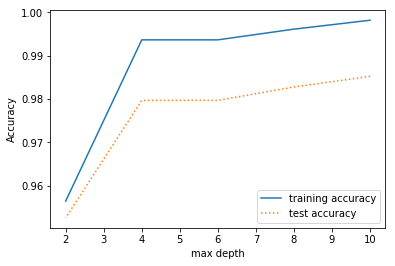

In [65]:
tree_settings = [10, 8, 6, 4, 2]

plt.plot(tree_settings, training_accuracy, label="training accuracy")
plt.plot(tree_settings, test_accuracy, label="test accuracy", linestyle= ':')
plt.ylabel("Accuracy")
plt.xlabel("max depth")
plt.legend()

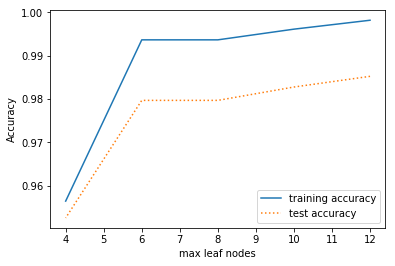

In [66]:
tree_settings = [12, 10, 8, 6, 4]

plt.plot(tree_settings, training_accuracy, label="training accuracy")
plt.plot(tree_settings, test_accuracy, label="test accuracy", linestyle= ':')
plt.ylabel("Accuracy")
plt.xlabel("max leaf nodes")
plt.legend()

### let's plot tree4 with max_depth 4 as our best choice

In [67]:
from sklearn.tree import export_graphviz

export_graphviz(tree4, out_file="tree.dot", class_names=["White", "Red"],
feature_names=names, impurity=False, filled=True)

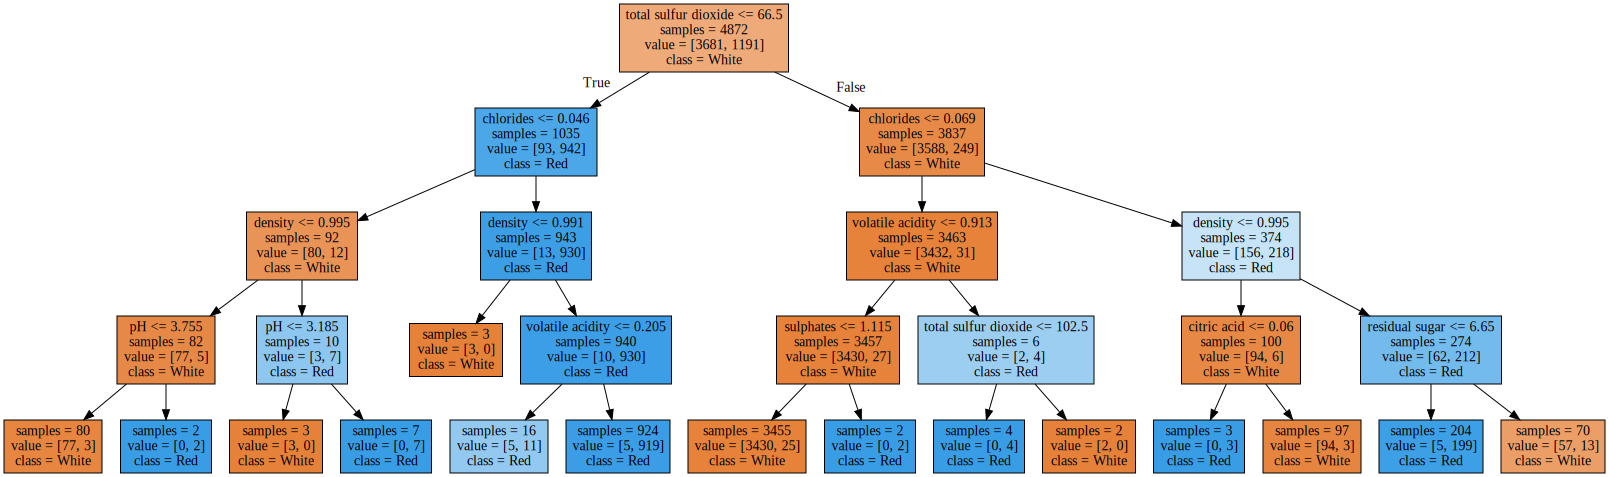

In [68]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [69]:
print("Feature importances:\n{}".format(tree4.feature_importances_))

Feature importances:
[0.         0.00483013 0.00323267 0.03845406 0.20414453 0.
 0.69047141 0.0519144  0.00462242 0.00233038 0.         0.        ]


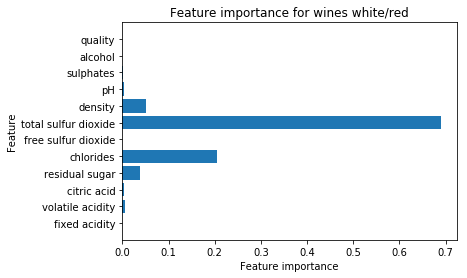

In [70]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), names)
    plt.title('Feature importance for wines white/red')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree4)

### finally, predict the quality of wine

### first classifier we choose is LinearSVC

In [71]:
from sklearn.svm import LinearSVC

X = np.array(df.drop(['quality'], 1))
y = np.array(df['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
training_accuracy = []
test_accuracy = []

svm = LinearSVC().fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Accuracy on training set: 0.439
Accuracy on test set: 0.451


In [72]:
#change to l1
svml1 = LinearSVC(penalty='l1', dual=False).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svml1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svml1.score(X_test, y_test)))

Accuracy on training set: 0.531
Accuracy on test set: 0.534


In [73]:
#decrease C
svm001 = LinearSVC(C=0.01, penalty='l1', dual=False).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svm001.score(X_train, y_train)))
training_accuracy.append(svm001.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(svm001.score(X_test, y_test)))
test_accuracy.append(svm001.score(X_test, y_test))

Accuracy on training set: 0.522
Accuracy on test set: 0.518


In [74]:
#decrease C
svmc01 = LinearSVC(C=0.1, penalty='l1', dual=False).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svmc01.score(X_train, y_train)))
training_accuracy.append(svmc01.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(svmc01.score(X_test, y_test)))
test_accuracy.append(svmc01.score(X_test, y_test))

Accuracy on training set: 0.529
Accuracy on test set: 0.535


In [75]:
#C=1
svmc1 = LinearSVC(penalty='l1', dual=False).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svmc1.score(X_train, y_train)))
training_accuracy.append(svmc1.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(svmc1.score(X_test, y_test)))
test_accuracy.append(svmc1.score(X_test, y_test))

Accuracy on training set: 0.530
Accuracy on test set: 0.531


In [76]:
#increase C
svmc10 = LinearSVC(C=10, penalty='l1', dual=False).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svmc10.score(X_train, y_train)))
training_accuracy.append(svmc10.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(svmc10.score(X_test, y_test)))
test_accuracy.append(svmc10.score(X_test, y_test))

Accuracy on training set: 0.531
Accuracy on test set: 0.529


In [77]:
#increase C
svmc100 = LinearSVC(C=100, penalty='l1', dual=False).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svmc100.score(X_train, y_train)))
training_accuracy.append(svmc100.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(svmc100.score(X_test, y_test)))
test_accuracy.append(svmc100.score(X_test, y_test))

Accuracy on training set: 0.531
Accuracy on test set: 0.529


In [78]:
#let's try to optimize a joint objective over all classes
svmcrammer = LinearSVC(multi_class='crammer_singer').fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svmcrammer.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svmcrammer.score(X_test, y_test)))

Accuracy on training set: 0.417
Accuracy on test set: 0.428


In [79]:
#balanced class weight
svmbalanced = LinearSVC(penalty='l1', dual=False, class_weight='balanced').fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svmbalanced.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svmbalanced.score(X_test, y_test)))

Accuracy on training set: 0.439
Accuracy on test set: 0.439


### plot accuracy

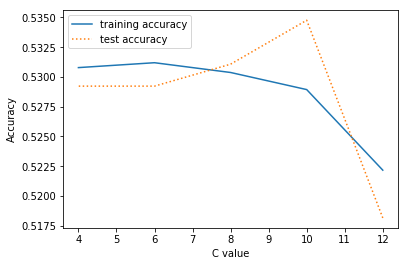

In [80]:
svm_settings = [0.01, 0.1, 1, 10, 100]

plt.plot(tree_settings, training_accuracy, label="training accuracy")
plt.plot(tree_settings, test_accuracy, label="test accuracy", linestyle= ':')
plt.ylabel("Accuracy")
plt.xlabel("C value")
plt.legend()

### plot coefficients for svmc01

In [81]:
names = list(df.drop(['quality'], 1))

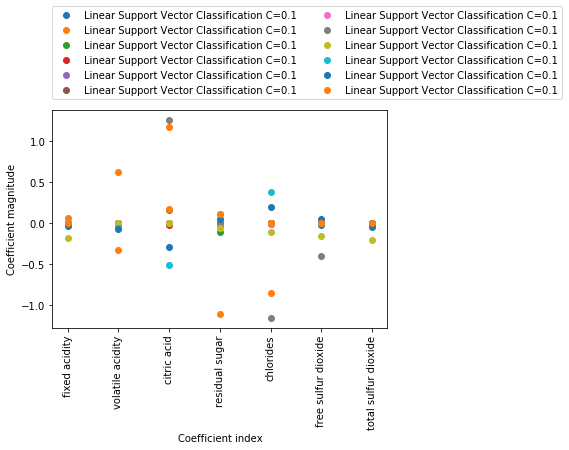

In [82]:
plt.plot(svmc01.coef_, 'o', label="Linear Support Vector Classification C=0.1")

plt.xticks(range(len(names)), names, rotation=90)
plt.hlines(0, 0, range(len(names)))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(ncol=2, loc=(0, 1.05))

### as second classifier we choose K nearest neighbours

In [83]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier 
X = np.array(df.drop(['quality'], 1))
y = np.array(df['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

# KNN works better with normalized values so scale X
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

training_accuracy = []
test_accuracy = []

In [84]:
# start with default 5 neighbours
kn = KNeighborsClassifier().fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(kn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(kn.score(X_test, y_test)))

Accuracy on training set: 0.698
Accuracy on test set: 0.560


In [85]:
# less neighbours
kn2 = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(kn2.score(X_train, y_train)))
training_accuracy.append(kn2.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(kn2.score(X_test, y_test)))
test_accuracy.append(kn2.score(X_test, y_test))

Accuracy on training set: 0.821
Accuracy on test set: 0.566


In [86]:
# less neighbours
kn4 = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(kn4.score(X_train, y_train)))
training_accuracy.append(kn4.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(kn4.score(X_test, y_test)))
test_accuracy.append(kn4.score(X_test, y_test))

Accuracy on training set: 0.720
Accuracy on test set: 0.566


In [87]:
# more neighbours
kn6 = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(kn6.score(X_train, y_train)))
training_accuracy.append(kn6.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(kn6.score(X_test, y_test)))
test_accuracy.append(kn6.score(X_test, y_test))

Accuracy on training set: 0.678
Accuracy on test set: 0.574


In [88]:
# more neighbours
kn8 = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(kn8.score(X_train, y_train)))
training_accuracy.append(kn8.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(kn8.score(X_test, y_test)))
test_accuracy.append(kn8.score(X_test, y_test))

Accuracy on training set: 0.646
Accuracy on test set: 0.567


In [89]:
# more neighbours
kn10 = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(kn10.score(X_train, y_train)))
training_accuracy.append(kn10.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(kn10.score(X_test, y_test)))
test_accuracy.append(kn10.score(X_test, y_test))

Accuracy on training set: 0.639
Accuracy on test set: 0.568


In [90]:
# weight by dist, p=1, neighbours = 4
kndist = KNeighborsClassifier(weights='distance', p=1, n_neighbors = 20).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(kndist.score(X_train, y_train)))
training_accuracy.append(kndist.score(X_train, y_train))
print("Accuracy on test set: {:.3f}".format(kndist.score(X_test, y_test)))
test_accuracy.append(kndist.score(X_test, y_test))

Accuracy on training set: 1.000
Accuracy on test set: 0.677


### plot accuracy

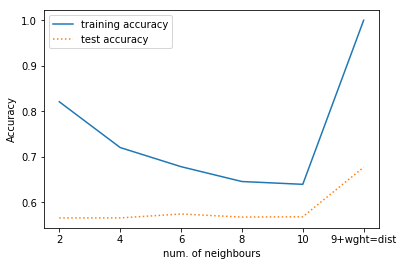

In [91]:
kn_settings = [2, 4, 6, 8, 10, '9+wght=dist']

plt.plot(kn_settings, training_accuracy, label="training accuracy")
plt.plot(kn_settings, test_accuracy, label="test accuracy", linestyle= ':')
plt.ylabel("Accuracy")
plt.xlabel("num. of neighbours")
plt.legend()